# **About the Dataset**

This data set contains the following features:

- **Daily Time Spent on Site**: consumer time on site in minutes
- **Age**: cutomer age in years
- **Area Income**: Avg. Income of geographical area of consumer
- **Daily Internet Usage**: Avg. minutes a day consumer is on the internet
- **Ad Topic Line**: Headline of the advertisement
- **City**: City of consumer
- **Male**: Whether or not consumer was male
- **Country**: Country of consumer
- **Timestamp**: Time at which consumer clicked on Ad or closed window
- **Clicked on Ad**: 0 or 1 indicated clicking on Ad

 # **Get the Data**

## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as tkr
from matplotlib import pyplot
from matplotlib.font_manager import FontProperties
import calendar
import datetime
import seaborn as sns
import folium
%matplotlib inline

In [2]:
os.chdir(r"J:\Learning Data Science\Python\Udemy Course\Py-DS-ML-Bootcamp-master\Refactored_Py_DS_ML_Bootcamp-master\13-Logistic-Regression")

## Reading the csv file

In [3]:
adv_df = pd.read_csv("advertising.csv")
adv_df.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
243,85.03,30,60372.64,204.52,Expanded clear-thinking core,North Shannon,0,Philippines,2016-06-19 09:24:35,0
741,70.90,28,71727.51,190.95,Centralized client-driven workforce,Port Juan,0,Kyrgyz Republic,2016-06-17 23:19:38,0
378,67.56,31,62318.38,125.45,Seamless composite budgetary management,Michelleside,0,Kenya,2016-04-25 21:15:39,1
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
348,76.20,37,75044.35,178.51,Multi-layered fresh-thinking process improvement,Karenton,0,Barbados,2016-02-29 19:26:35,0


## Checking the count of Missing Values

In [4]:
adv_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


<AxesSubplot:>

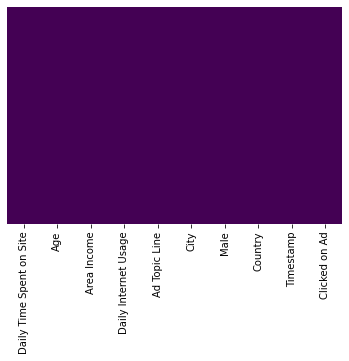

In [5]:
sns.heatmap(adv_df.isnull(),yticklabels=False,cbar=False,cmap='viridis') 
# No missing value in the dataset

## Converting timeStamp to DateTime64 format

In [6]:
adv_df['Timestamp'] = pd.to_datetime(adv_df['Timestamp'])

# **Feature Creation and Exploratory Data Analysis**

## Class Distribution

In [7]:
adv_df_count = pd.DataFrame(adv_df.groupby("Clicked on Ad").size().sort_values(ascending=False))
adv_df_count.columns = ["Count"]
adv_df_count

,Count
Clicked on Ad,
1,500
0,500


## Extracting Month, Day, and Hour

In [8]:
adv_df["Month_No"] = adv_df["Timestamp"].dt.month
adv_df["Day_No"] = adv_df["Timestamp"].dt.dayofweek # 0 means Monday and 6 implies Sunday
adv_df["Hour"] = adv_df.Timestamp.dt.hour

In [9]:
# Extracting only those records where the user clicked on the advertisements
top5_month = pd.DataFrame(adv_df[adv_df["Clicked on Ad"]==1].groupby("Month_No").size().sort_values(ascending=False))
top5_day = pd.DataFrame(adv_df[adv_df["Clicked on Ad"]==1].groupby("Day_No").size().sort_values(ascending=False))
top5_hour = pd.DataFrame(adv_df[adv_df["Clicked on Ad"]==1].groupby("Hour").size().sort_values(ascending=False))

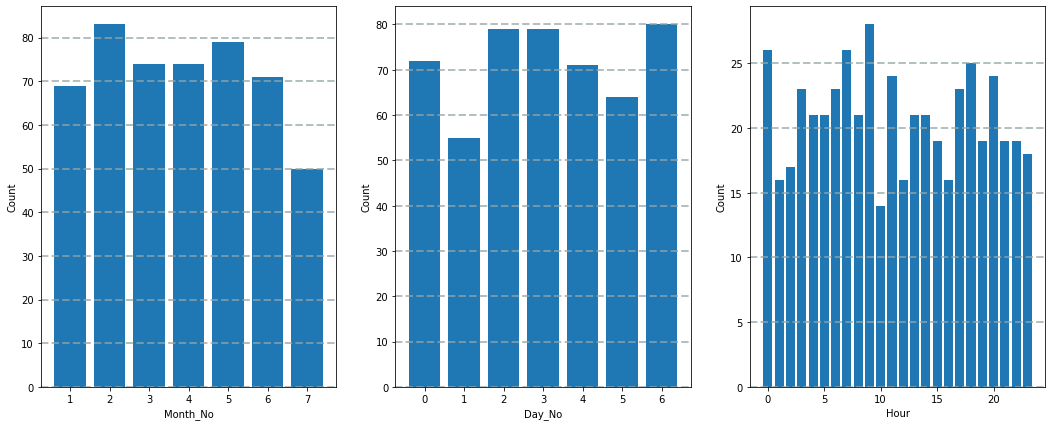

In [10]:
aa = [top5_month,top5_day,top5_hour]
fig = plt.figure(figsize=(18, 7))

for i in range(len(aa)):
    ax = fig.add_subplot(1, 3, i+1)
    plt.bar(aa[i].index,aa[i][0])
    plt.xlabel(aa[i].index.name)
    plt.ylabel("Count")
    plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

## Creating a Datafrae with only useful columns

In [11]:
adv_df_1 = adv_df.iloc[:,[0,1,2,3,6,9,10,11,12]]

## Skewness Distribution

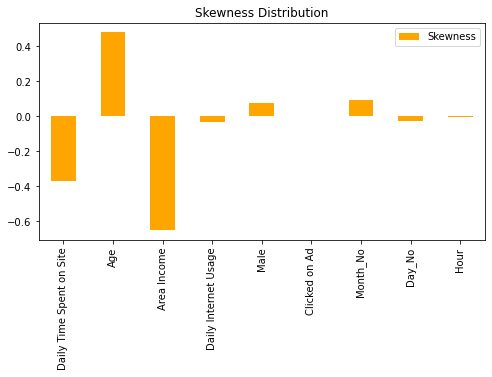

In [12]:
adv_df_skewness = pd.DataFrame(adv_df_1.skew(), columns=["Skewness"])
adv_df_skewness.plot.bar(color="orange",figsize=(8,4))
plt.title("Skewness Distribution")
plt.show()

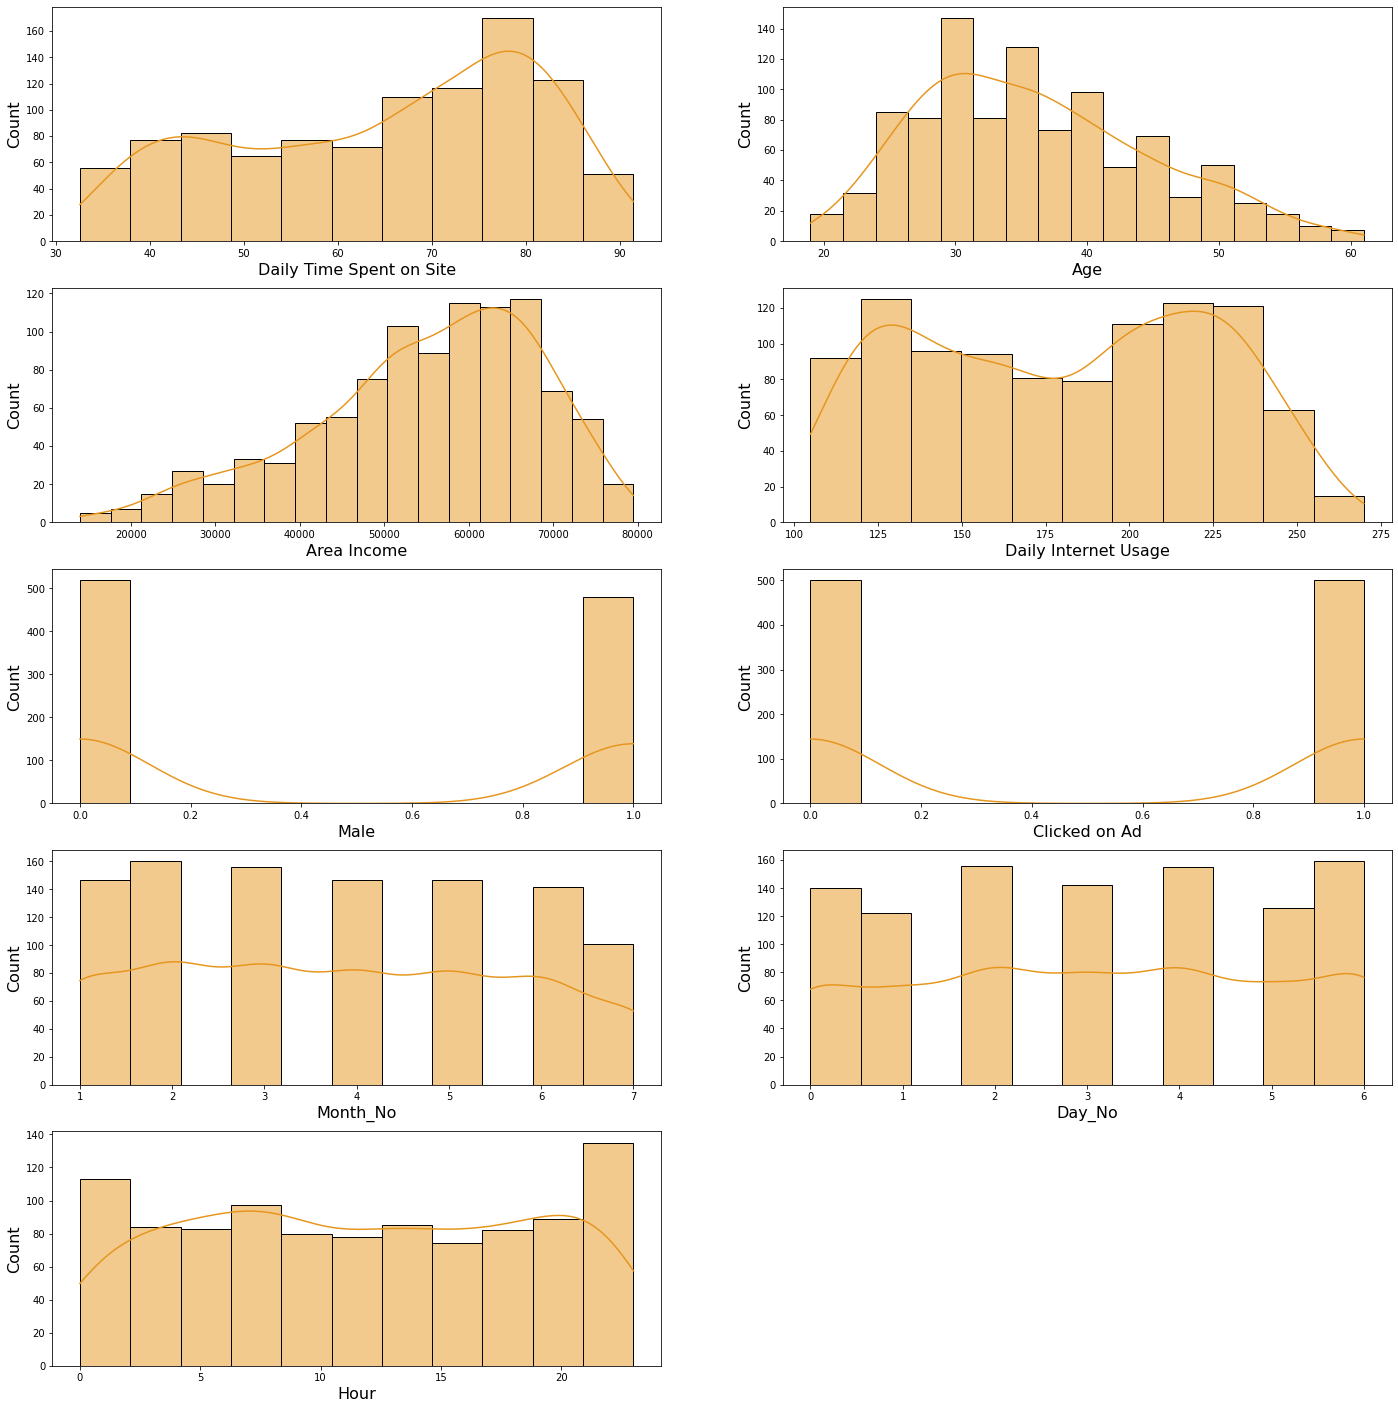

In [13]:
fig = plt.figure(figsize=(24, 25))

for i, col in enumerate(adv_df_1):
    ax = fig.add_subplot(5, 2, i+1)
    l = ax.get_xlabel()
    ax.set_xlabel(l,fontsize=16)
    k = ax.get_xlabel()
    ax.set_ylabel(k,fontsize=16)
    sns.histplot(adv_df[col], color="#e6961e", kde=True)

## Pairplot

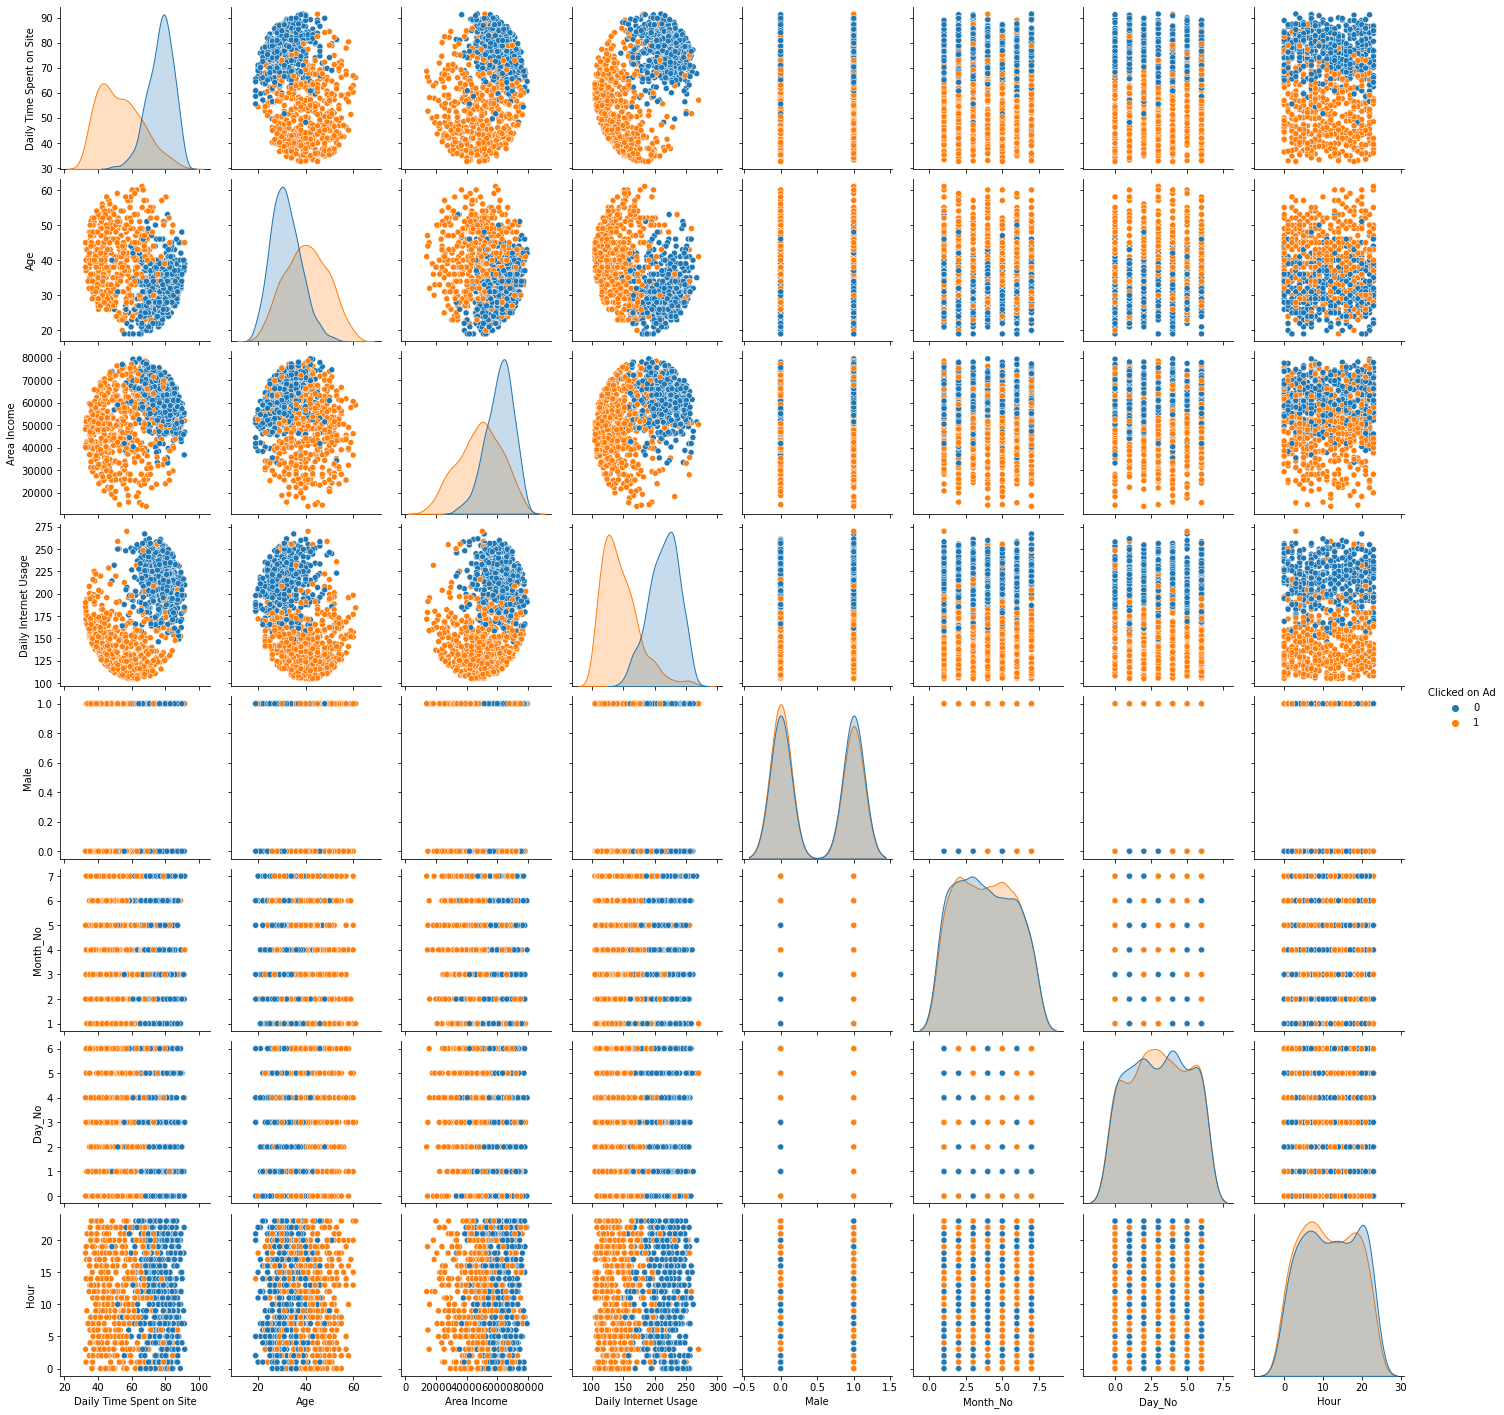

In [14]:
sns.pairplot(adv_df_1, diag_kind="kde", hue="Clicked on Ad")

## Interpretation

- This is a well-balanced dataset. There is an equal number of records for each category for the target variable (i.e., "Clicked on Ad" column).
- More people clicked on Ads in February than in any other month. Similarly, on Sunday, more people clicked on ads. Talking about the hour of the day, 9 am and 12 am is when the highest number of people clicked on ads.
- "Area Income", "Age", "Daily Time spent on-site" - These three variables are highly skewed in comparison to the other variables. Out of the three columns mentioned, the Age column is positively skewed. Positive skew implies that more values are clustered around the left tail and the right tail is slightly longer. The kernel density estimate further confirms this observation.
- In the scatter matrix of the pair plot, the points are clustered based on if people clicked the ads or not.

# **Logistic Regression Model**

## Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(adv_df_1.drop('Clicked on Ad',axis=1), 
                                                    adv_df_1['Clicked on Ad'], test_size=0.30, 
                                                    random_state=101)

## Model Development

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\dpnsh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
predictions = logmodel.predict(X_test)

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       157
           1       0.94      0.87      0.91       143

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [22]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.248246
         Iterations 8
                             Results: Logit
Model:                Logit              Pseudo R-squared:   0.642      
Dependent Variable:   Clicked on Ad      AIC:                363.5447   
Date:                 2021-07-15 05:56   BIC:                399.9534   
No. Observations:     700                Log-Likelihood:     -173.77    
Df Model:             7                  LL-Null:            -485.06    
Df Residuals:         692                LLR p-value:        3.3344e-130
Converged:            1.0000             Scale:              1.0000     
No. Iterations:       8.0000                                            
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Daily Time Spent on Site -0.0613   0.0102 -5.9847 0

## Model Evaluation

In [23]:
# performing predictions on the test datdaset
yhat = logmodel.predict(X_test)
prediction = list(map(round, yhat))
  
# comparing original and predicted values of y
print('Actual values :\n', list(y_test.values))

print('\nPredictions :\n', prediction)

Actual values :
 [1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0]

Predictions :
 [1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
df = confusion_matrix(y_test, yhat)

# accuracy: (tp + tn) / (p + n)
log_acc = round(accuracy_score(y_test, yhat),2)

# precision tp / (tp + fp)
log_precision = round(precision_score(y_test, yhat),2)

# recall: tp / (tp + fn)
log_recall = round(recall_score(y_test, yhat),2)

# f1: 2 tp / (2 tp + fp + fn)
log_f1 = round(f1_score(y_test, yhat),2)

LogReg_mod = pd.DataFrame({'Parameter':['Accuracy', 'Precision', 'Recall', 'F1-Score'],'Logistic Regression':[log_acc, log_precision, log_recall, log_f1]})
LogReg_mod = LogReg_mod.set_index("Parameter")
LogReg_mod

,Logistic Regression
Parameter,
Accuracy,0.91
Precision,0.94
Recall,0.87
F1-Score,0.91


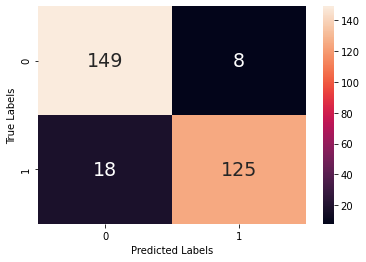

In [26]:
df_cm = pd.DataFrame(df, range(2), range(2))
sns.heatmap(df, annot=True, annot_kws={"size": 19},fmt='g',) # font size
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels") 
plt.show()

## Interpretation

- The training and testing dataset was split into a ratio of 0.3. There were 700 observations in the training set and 300 observations in the testing set.
- The p-value of all predictor variables are statistically significant except "Male" variable. The model can be further improved by removing this variable. 
- The model has a AIC score of 363.54, and BIC score of 399.95. This value doesn't mean anything currently because we only have one model. These values will be helpful if we have more than one model. In that case, we can select the model which has the lowest score for these parameters. 
- From the confusion matrix, we can see that the number of true positives and true negatives is high which resulted in a higher accuracy (91.3%). The model has True Positive Rate of 87.4%. True positive rate means when its actually yes, how often does model predict yes.
- The model has a precision of 93.9%. This implies that when model predicts yes, it'll be 93.9% times correct.

# **K-Nearest Neighbors Model**

## Standardize Data

In [27]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

# separate array into input and output components
X = adv_df_1.iloc[:,[0,1,2,3,4,6,7,8]]
y = adv_df_1.iloc[:,[5]]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

## Train Test Split

In [28]:
from sklearn.neighbors import KNeighborsClassifier
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(rescaledX, y, test_size=0.30, random_state=42)

In [29]:
knn = KNeighborsClassifier(n_neighbors=1)

In [30]:
knn.fit(X_train_knn,y_train_knn)

<ipython-input-30-9d048c65267d>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train_knn,y_train_knn)


KNeighborsClassifier(n_neighbors=1)

In [31]:
pred = knn.predict(X_test_knn)
pred

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0], d

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print(confusion_matrix(y_test_knn,pred))

[[137   9]
 [ 14 140]]


In [34]:
print(classification_report(y_test_knn,pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       146
           1       0.94      0.91      0.92       154

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



## Choosing a K value

In [ ]:
from sklearn.metrics import accuracy_score
error_rate = []
accuracy_knn = []

# Will take some time
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_knn,y_train_knn)
    pred_i = knn.predict(X_test_knn)
    accuracy_knn.append(accuracy_score(y_test_knn, pred_i))
    error_rate.append(np.mean(pred_i.reshape(300,1) != y_test_knn))

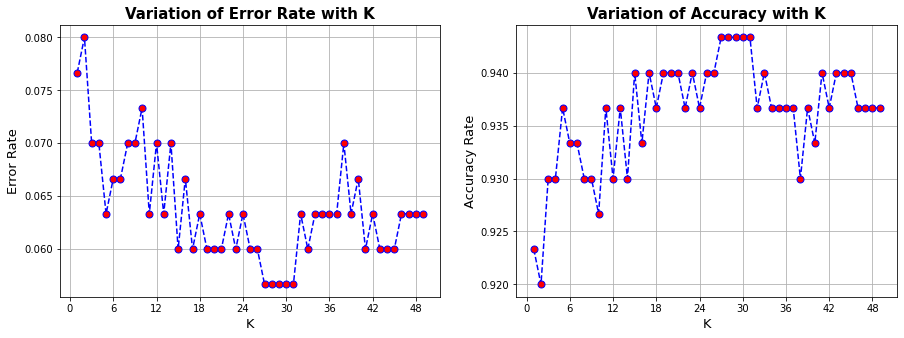

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
ax1.plot(range(1,50),error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=7)
ax2.plot(range(1,50),accuracy_knn, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=7)

ax1.set_xticks(np.arange(0,52,6))
ax1.set_xlabel('K',fontsize=13)
ax1.set_ylabel('Error Rate',fontsize=13)

ax2.set_xticks(np.arange(0,52,6))
ax2.set_xlabel('K',fontsize=13)
ax2.set_ylabel('Accuracy Rate',fontsize=13)

ax1.set_title('Variation of Error Rate with K',fontweight="bold", fontsize=15)
ax2.set_title("Variation of Accuracy with K",fontweight="bold",fontsize=15)

ax2.grid()
ax1.grid()

## Model Development

In [37]:
knn = KNeighborsClassifier(n_neighbors=28)
knn.fit(X_train_knn,y_train_knn)

<ipython-input-37-4b2dfce7308b>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train_knn,y_train_knn)


KNeighborsClassifier(n_neighbors=28)

## Model Evaluation

In [38]:
pred_knn = knn.predict(X_test_knn)

# comparing original and predicted values of y
print('Actual values :\n', list(y_test_knn["Clicked on Ad"].values))
print('\nPredictions :\n', list(pred_knn))

Actual values :
 [1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0]

Predictions :
 [1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,

In [39]:
df_knn = confusion_matrix(y_test_knn, pred_knn)
df_knn

array([[145,   1],
       [ 16, 138]], dtype=int64)

In [40]:
# accuracy: (tp + tn) / (p + n)
KNN_acc = round(accuracy_score(y_test_knn, pred_knn),2)

# precision tp / (tp + fp)
KNN_precision = round(precision_score(y_test_knn, pred_knn),2)

# recall: tp / (tp + fn)
KNN_recall = round(recall_score(y_test_knn, pred_knn),2)

# f1: 2 tp / (2 tp + fp + fn)
KNN_f1 = round(f1_score(y_test_knn, pred_knn),2)

KNN_Mod = pd.DataFrame({'Parameter':['Accuracy', 'Precision', 'Recall', 'F1-Score'],'KNN':[KNN_acc, KNN_precision, KNN_recall, KNN_f1]})
KNN_Mod = KNN_Mod.set_index("Parameter")
KNN_Mod

,KNN
Parameter,
Accuracy,0.94
Precision,0.99
Recall,0.90
F1-Score,0.94


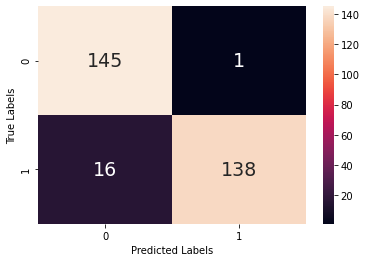

In [41]:
df_knn_cm = pd.DataFrame(df_knn, range(2), range(2))
sns.heatmap(df_knn, annot=True, annot_kws={"size": 19},fmt='g',) # font size
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels") 
plt.show()

## Interpretation

- KNN uses a distance metric to find the k most similar instances in the training data for a new instance and takes the mean outcome of the neighbors as the prediction.
- The data was standardized.
- The value of K chosen was 28 The error rate stabilized from K=28 onwards. The accuracy also stabilized after K=28 onwards. 
- From the confusion matrix, we an see that the accuracy is 94.33%.  
- The model has excellent precision (~ 99.2%). This implies that when model predicts that the user clicked on the advertisement, it is 99.2% of the times correct.

# **Decision Tree Model**

## Model Development

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
path = dtree.cost_complexity_pruning_path(X_train, y_train)
alphas = path["ccp_alphas"]
alphas

array([0.        , 0.00128571, 0.00136364, 0.00141767, 0.00142361,
       0.00142857, 0.00142857, 0.00149179, 0.00190476, 0.00196496,
       0.00214286, 0.00331263, 0.00438261, 0.00589012, 0.00788565,
       0.0084    , 0.00842426, 0.01553646, 0.02111951, 0.06055977,
       0.32966468])

In [45]:
acc_train_dree, acc_test_dtree = [],[]

for i in alphas:
    dec_tree = DecisionTreeClassifier(ccp_alpha=i)
    dec_tree.fit(X_train, y_train)
    y_train_dtree = dec_tree.predict(X_train)
    y_test_dtree = dec_tree.predict(X_test)
    acc_train_dree.append(accuracy_score(y_train,y_train_dtree))
    acc_test_dtree.append(accuracy_score(y_test,y_test_dtree))

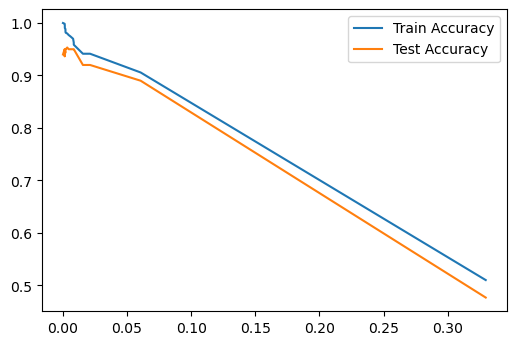

In [46]:
fig, ax = plt.subplots(dpi=100)
plt.plot(alphas, acc_train_dree)
plt.plot(alphas, acc_test_dtree)
ax.legend(['Train Accuracy', 'Test Accuracy'])

In [47]:
dtree = DecisionTreeClassifier(random_state=42,ccp_alpha=0.0025)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0025, random_state=42)

In [48]:
from IPython.display import Image  
from six import StringIO 
from sklearn.tree import export_graphviz
import pydot 

dff = X_train
dff["Clicked Adds"] = y_train

features = list(dff.columns[0:8])
features

['Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage',
 'Male',
 'Month_No',
 'Day_No',
 'Hour']

## Decision Tree Visualization

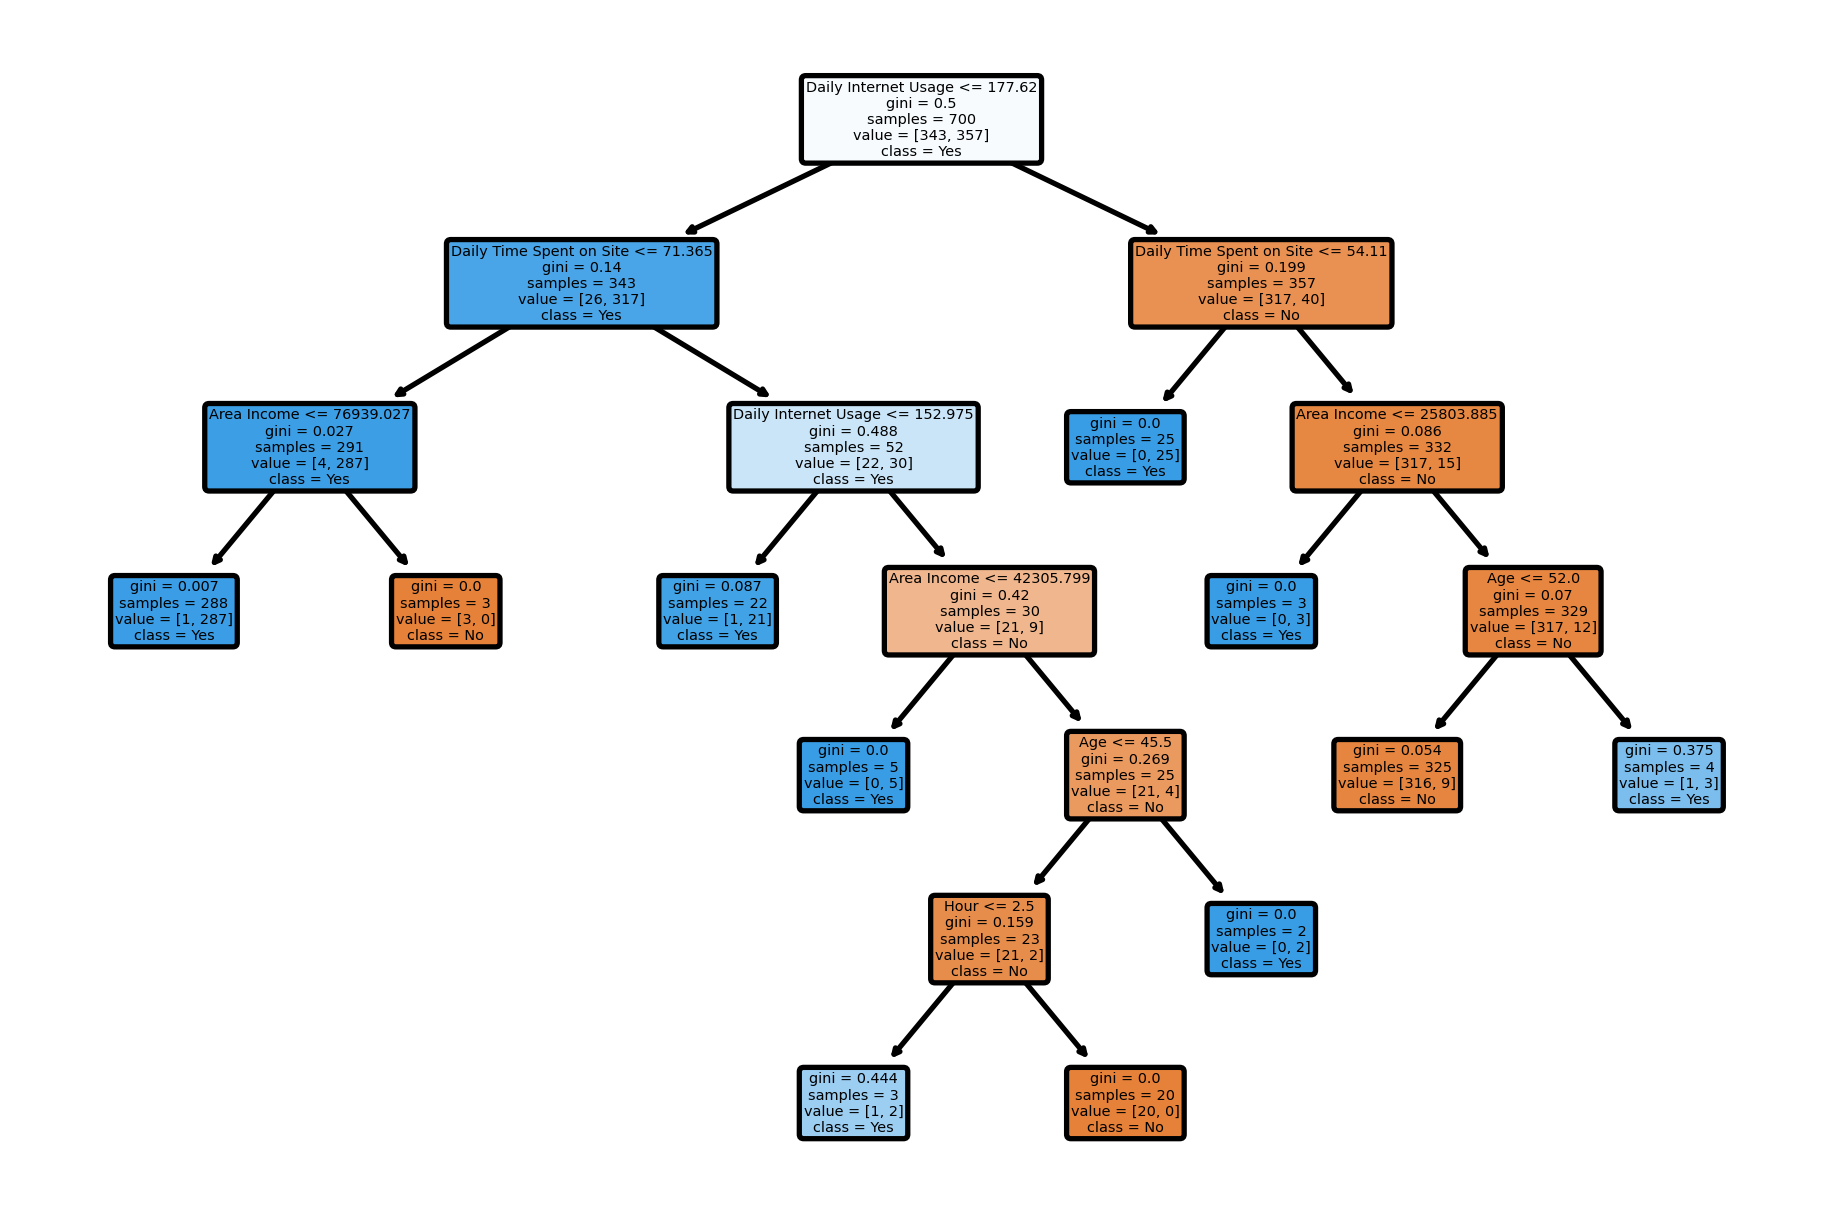

In [49]:
from sklearn.tree import plot_tree
plt.figure(dpi=380)
plot_tree(dtree, filled=True, rounded=True, class_names=["No","Yes"], feature_names=features)
plt.show()

## Model Evaluation

In [50]:
pred_dectree = dtree.predict(X_test)

# comparing original and predicted values of y
print('Actual values :\n', list(y_test.values))
print('\nPredictions :\n', list(pred_dectree))

Actual values :
 [1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0]

Predictions :
 [1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,

In [51]:
print(classification_report(y_test,pred_dectree))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       157
           1       0.96      0.94      0.95       143

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [52]:
df_dectree = confusion_matrix(y_test, pred_dectree)
df_dectree

array([[151,   6],
       [  9, 134]], dtype=int64)

In [53]:
# accuracy: (tp + tn) / (p + n)
DecTree_acc = round(accuracy_score(y_test, pred_dectree),2)

# precision tp / (tp + fp)
DecTree_precision = round(precision_score(y_test, pred_dectree),2)

# recall: tp / (tp + fn)
DecTree_recall = round(recall_score(y_test, pred_dectree),2)

# f1: 2 tp / (2 tp + fp + fn)
DecTree_f1 = round(f1_score(y_test, pred_dectree),2)

DecTree_Mod = pd.DataFrame({'Parameter':['Accuracy', 'Precision', 'Recall', 'F1-Score'],'Decision Tree':[DecTree_acc, DecTree_precision, DecTree_recall, DecTree_f1]})
DecTree_Mod = DecTree_Mod.set_index("Parameter")
DecTree_Mod

,Decision Tree
Parameter,
Accuracy,0.95
Precision,0.96
Recall,0.94
F1-Score,0.95


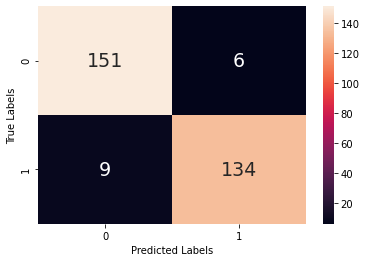

In [54]:
df_dectree_cm = pd.DataFrame(df_dectree, range(2), range(2))
sns.heatmap(df_dectree, annot=True, annot_kws={"size": 19},fmt='g',) # font size
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels") 
plt.show()

## Interpretation

- Split points in the tree are chosen greedily by evaluating each attribute and each value of each attribute in the training data in order to minimize a cost function (like the Gini index).
- The accuracy of the model is 94.33%. The model does a good job in correctly classfying the true positives and negatives.
- The complexity parameter was chosen to be 0.001 as it gave the highest accuracy for both training and testing dataset. Our model is now more generalized and it will perform better on unseen data.

# **Random Forest Model**

## Model Development

In [55]:
X_train = X_train.iloc[:,0:8]
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200,max_depth = 4)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=200)

In [56]:
# Making predictions on Test set
rfc_pred = rfc.predict(X_test)

# comparing original and predicted values of y
print('Actual values :\n', list(y_test.values))
print('\nPredictions :\n', list(rfc_pred))

Actual values :
 [1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0]

Predictions :
 [1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,

## Model Evaluation

In [57]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       157
           1       0.96      0.94      0.95       143

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [58]:
df_rfc = confusion_matrix(y_test, rfc_pred) 
df_rfc

array([[152,   5],
       [  9, 134]], dtype=int64)

In [59]:
# accuracy: (tp + tn) / (p + n)
RFC_acc = round(accuracy_score(y_test, rfc_pred),2)

# precision tp / (tp + fp)
RFC_precision = round(precision_score(y_test, rfc_pred),2)

# recall: tp / (tp + fn)
RFC_recall = round(recall_score(y_test, rfc_pred),2)

# f1: 2 tp / (2 tp + fp + fn)
RFC_f1 = round(f1_score(y_test, rfc_pred),2)

RFC_Mod = pd.DataFrame({'Parameter':['Accuracy', 'Precision', 'Recall', 'F1-Score'],'Random Forest':[RFC_acc, RFC_precision, RFC_recall, RFC_f1]})
RFC_Mod = RFC_Mod.set_index("Parameter")
RFC_Mod

,Random Forest
Parameter,
Accuracy,0.95
Precision,0.96
Recall,0.94
F1-Score,0.95


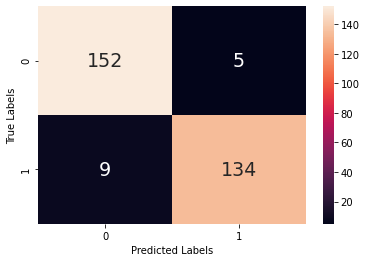

In [60]:
df_rfc_cm = pd.DataFrame(df_rfc, range(2), range(2))
sns.heatmap(df_rfc, annot=True, annot_kws={"size": 19},fmt='g',) # font size
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels") 
plt.show()

In [61]:
# Get numerical feature importances
pd.DataFrame(list(rfc.feature_importances_), X_train.columns, columns=["Importance"])

,Importance
Daily Time Spent on Site,0.333581
Age,0.103944
Area Income,0.109395
Daily Internet Usage,0.428007
Male,0.002814
Month_No,0.006765
Day_No,0.005808
Hour,0.009686


## Interpretation

- The random forest combines hundreds or thousands of decision trees, trains each one on a slightly different set of the observations, splitting nodes in each tree considering a limited number of the features. The final predictions of the random forest are made by averaging the predictions of each individual tree.
- For our case, the tltal count of decision trees was set to 200. I did not set a very high number as it may increase the probability of overfitting.
- The appears to perform slightly better than the decision tree. The accuracy of the model is 96%. However, K-Nearest Neighbors had better precision than the Random Forest.
- The model can definitely be improvised by removing variables like "Male", "Month_No", "Day_No", and "Hour" as their importance is fairly low.

# **Support Vector Machines (SVM)**

## Model Development

In [62]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train_knn,y_train_knn)

C:\Users\dpnsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [63]:
pred_SVM = model.predict(X_test_knn) # The subsets used here are X_train_knn, y_train_knn, X_test_knn, y_test_knn
# SVM requires data to be standardized as the optimal hyperplane is influenced by the scale of the input features. 

In [64]:
df_svm = confusion_matrix(y_test_knn, pred_SVM) 
df_svm

array([[142,   4],
       [  8, 146]], dtype=int64)

In [65]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       157
           1       0.94      0.87      0.91       143

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



## Gridsearch

In [66]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_test_knn,y_test_knn)

GridSearchCV is that it is a meta-estimator. It takes an estimator like SVC, and creates a new estimator, that behaves exactly the same - in this case, like a classifier.

In [68]:
grid.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}

In [69]:
grid.best_estimator_

SVC(C=0.1, gamma=0.1)

## Model Evaluation

In [70]:
grid_predictions = grid.predict(X_test_knn)

In [71]:
print(classification_report(y_test_knn,grid_predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       146
           1       0.99      0.95      0.97       154

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [72]:
svm_cf = confusion_matrix(y_test_knn,grid_predictions)

In [73]:
# accuracy: (tp + tn) / (p + n)
SVM_acc = round(accuracy_score(y_test_knn, grid_predictions),2)

# precision tp / (tp + fp)
SVM_precision = round(precision_score(y_test_knn, grid_predictions),2)

# recall: tp / (tp + fn)
SVM_recall = round(recall_score(y_test_knn, grid_predictions),2)

# f1: 2 tp / (2 tp + fp + fn)
SVM_f1 = round(f1_score(y_test_knn, grid_predictions),2)

SVM_Mod = pd.DataFrame({'Parameter':['Accuracy', 'Precision', 'Recall', 'F1-Score'],'SVM':[SVM_acc, SVM_precision, SVM_recall, SVM_f1]})
SVM_Mod = SVM_Mod.set_index("Parameter")
SVM_Mod

,SVM
Parameter,
Accuracy,0.97
Precision,0.99
Recall,0.95
F1-Score,0.97


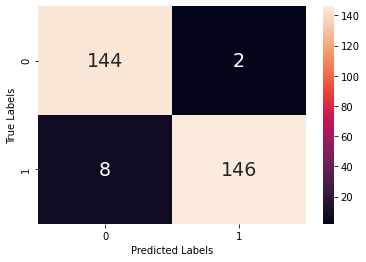

In [74]:
df_svm_cm = pd.DataFrame(svm_cf, range(2), range(2))
sns.heatmap(svm_cf, annot=True, annot_kws={"size": 19},fmt='g',) # font size
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels") 
plt.show()

## Interpretation

- It is critical that the dataset is standardized before the SVM model is developed. 
- The model has an accuracy of 96.67%. The model has a very high value of precision. It looks like that model does a very good job in predicting those cases where user did not click the add. SVM requires data to be standardized as the optimal hyperplane is influenced by the scale of the input features. 
- After the model was developed, the parameters were further tuned to enhance the quality of the model. 0.1 was chosen as the value for gamma and C. 

# **Conclusion**

## Model Comparison

In [80]:
 pd.concat([LogReg_mod,KNN_Mod,DecTree_Mod,RFC_Mod,SVM_Mod], axis=1)

,Logistic Regression,KNN,Decision Tree,Random Forest,SVM
Parameter,,,,,
Accuracy,0.91,0.94,0.95,0.95,0.97
Precision,0.94,0.99,0.96,0.96,0.99
Recall,0.87,0.90,0.94,0.94,0.95
F1-Score,0.91,0.94,0.95,0.95,0.97


- The confusion matrix provides more insight into the accuracy of a predictive model and which classes are being predicted correctly, which incorrectly, and what type of errors are being made.
- For the Advertisements Dataset, 5 different machine learning models were developed to predict if a person would click on the advertisements or not provided we have information about the dependent variables.
- From the summary provided, it is evident that the SVM model works slightly better than all other models.
- While SVM turned out to be the best model, it looks like Logistic regression is the worst model out of all for this particular dataset.
- Overall, SVM has a high Classification Accuracy.
- In all the classification models, the test and train dataset was split randomly. However, the models can be further improved by using Cross-Validation method for splitting the data into test and train. The way the data is resampled has the potential to affect the overall quality of the model.
- The input parameters can be further tuned to improvise the quality of the model. No attempt was made to tune the parameters except the SVM model, as the accuracy was already high. There is always a slight risk of overfitting the model if the parameters are tuned extensively.

-- **Deepansh Arora**